# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

In [1]:
import pandas as pd

In [2]:
import statsmodels.api as sm

In [5]:
original_data=pd.read_csv("house_price.csv")

In [6]:
original_data.sample(8)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
196,4970000,7686,3,1,1,yes,yes,yes,yes,no,0,no,semi-furnished
276,4305000,4400,2,1,1,yes,no,no,no,no,1,no,semi-furnished
270,4340000,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
443,3220000,4320,3,1,1,no,no,no,no,no,1,no,unfurnished
80,6629000,6000,3,1,2,yes,no,no,yes,no,1,yes,semi-furnished
28,8400000,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
61,7070000,8880,2,1,1,yes,no,no,no,yes,1,no,semi-furnished
490,2835000,4350,3,1,2,no,no,no,yes,no,1,no,unfurnished


In [164]:
data=pd.get_dummies(original_data, columns=["mainroad","guestroom","basement","prefarea","airconditioning","hotwaterheating"],dtype=int, drop_first=True)

In [165]:
data_1=pd.get_dummies(data, columns=["furnishingstatus"],dtype=int, drop_first=True)

In [166]:
data_1.sample(8)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,prefarea_yes,airconditioning_yes,hotwaterheating_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
81,6615000,4000,3,2,2,1,1,0,1,0,1,0,1,0
180,5215000,4500,4,2,1,2,0,0,1,0,1,0,1,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
141,5652500,6660,4,2,2,1,1,1,1,1,0,0,1,0
327,3990000,6480,3,1,2,1,0,0,0,0,1,0,1,0
457,3115000,3000,3,1,1,0,0,0,0,0,1,0,0,1
527,2275000,1836,2,1,1,0,0,0,1,0,0,0,1,0
324,4007500,4500,3,1,2,0,0,0,1,0,1,0,1,0


In [31]:
data_1.info(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    int32
 7   guestroom_yes                    545 non-null    int32
 8   basement_yes                     545 non-null    int32
 9   prefarea_yes                     545 non-null    int32
 10  airconditioning_yes              545 non-null    int32
 11  hotwaterheating_yes              545 non-null    int32
 12  furnishingstatus_semi-furnished  545 non-null    i

## 先把所有参数转化为数值

In [28]:
y=data_1['price']

In [32]:
X=data_1.drop('price',axis=1)

In [33]:
X.corr().abs()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,prefarea_yes,airconditioning_yes,hotwaterheating_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,0.234779,0.222393,0.009229,0.006156,0.142278
bedrooms,0.151858,1.000000,0.373930,0.408564,0.139270,0.012033,0.080549,0.097312,0.079023,0.160603,0.046049,0.050040,0.126252
bathrooms,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.063472,0.186915,0.067159,0.029834,0.132107
stories,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,0.172394,0.044425,0.293602,0.018847,0.003648,0.082972
parking,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.091627,0.159173,0.067864,0.041327,0.165705
mainroad_yes,0.288874,0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,0.199876,0.105423,0.011781,0.011450,0.133123
guestroom_yes,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,0.160897,0.138179,0.010308,0.005821,0.099023
basement_yes,0.047417,0.097312,0.102106,0.172394,0.051497,0.044002,0.372066,1.000000,0.228083,0.047341,0.004385,0.050284,0.117935
prefarea_yes,0.234779,0.079023,0.063472,0.044425,0.091627,0.199876,0.160897,0.228083,1.000000,0.117382,0.059411,0.011535,0.081271
airconditioning_yes,0.222393,0.160603,0.186915,0.293602,0.159173,0.105423,0.138179,0.047341,0.117382,1.000000,0.130023,0.053179,0.094086


In [34]:
import seaborn as sns

<Axes: >

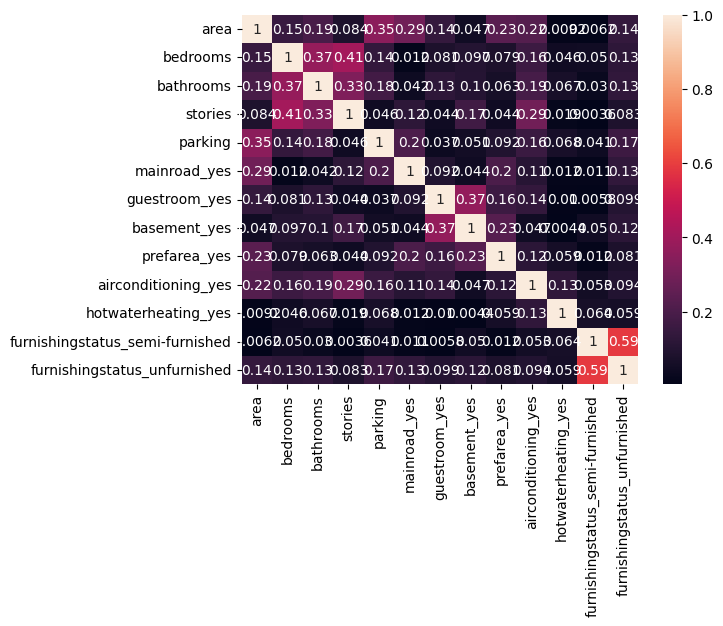

In [40]:
sns.heatmap(X.corr().abs(),annot=True)

## 从上热力图可以看出，基本的相关性都很小，所有的参数都可以保留

In [41]:
X=sm.add_constant(X)

In [42]:
mode=sm.OLS(y,X)

In [44]:
result=sm.OLS(y,X).fit()

In [45]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          9.07e-123
Time:                        11:07:14   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 到目前，我们已经得到了这个线性回归方程，虽然$R^2$比较小，证明拟合的程度比较低

### 那现在我们要拟合了，数据为面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

那我们移除一下P值很大的那些数据，再重新进行一下拟合

In [77]:
X=X.drop(['const','furnishingstatus_semi-furnished','guestroom_yes'], axis=1)

In [78]:
mode=sm.OLS(y,X)

In [151]:
result=sm.OLS(y,X).fit()

In [277]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1085.
Date:                Mon, 19 Aug 2024   Prob (F-statistic):                        0.00
Time:                        13:13:08   Log-Likelihood:                         -8334.3
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           248.7051     23.499     10.584      0.000     202.544     294.867
bedrooms                      1.066e+05   5.92e+04      1.802      0.072   -9620.567    2.23e+05
bathrooms                     9.975e+05   1.02e+05      9.805      0.000    7.98e+05     1.2e+06
stories                       4.599e+05   6.42e+04      7.169      0.000    3.34e+05    5.86e+05
parking                        2.72e+05   5.83e+04      4.665      0.000    1.57e+05    3.86e+05
mainroad_yes                  4.279e+05   1.29e+05      3.319      0.001    1.75e+05    6.81e+05
basement_yes                  4.369e+05   1.03e+05      4.228      0.000    2.34e+05     6.4e+05
prefarea_yes                  6.652e+05   1.15e+05      5.769      0.000    4.39e+05    8.92e+05
airconditioning_yes            8.88e+05   1.08e+05      8.261      0.000    6.77e+05     1.1e+06
hotwaterheating_yes           8.531e+05   2.24e+05      3.815      0.000    4.14e+05    1.29e+06
furnishingstatus_unfurnished -3.913e+05   9.63e+04     -4.064      0.000    -5.8e+05   -2.02e+05
==============================================================================
Omnibus:                       95.908   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.715
Skew:                           0.890   Prob(JB):                     1.20e-53
Kurtosis:                       5.750   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

现在的$R2$值比较接近1了，所以我们认为拟合的情况是比较好的

In [295]:
new_data = {
    "area": int(6500),
    "bedrooms": int(4),
    "bathrooms": int(2),
    "stories":int(2),
    "parking": int(2),
    "mainroad": ["yes"],
    "guestroom": ["no"],
    "basement": ["yes"],
    "prefarea":["yes"],
    "airconditioning": ["yes"],
    "hotwaterheating": ["1"],
    "furnishingstatus": ["semi-furnished"],
   
}

new_predict = pd.DataFrame(new_data)

In [296]:
new_predict

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,prefarea,airconditioning,hotwaterheating,furnishingstatus
0,6500,4,2,2,2,yes,no,yes,yes,yes,1,semi-furnished


In [297]:
new_predict['mainroad'] = pd.Categorical(new_predict['mainroad'],categories=['no','yes'])
new_predict['guestroom'] = pd.Categorical(new_predict['guestroom'],categories=['no','yes'])
new_predict['basement'] = pd.Categorical(new_predict['basement'],categories=['no','yes'])
new_predict['prefarea'] = pd.Categorical(new_predict['prefarea'],categories=['no','yes'])
new_predict['airconditioning'] = pd.Categorical(new_predict['airconditioning'],categories=['no','yes'])
new_predict['hotwaterheating'] = pd.Categorical(new_predict['hotwaterheating'],categories=['no','yes'])
new_predict['furnishingstatus'] = pd.Categorical(new_predict['furnishingstatus'],categories=['furnished', 'semi-furnished', 'unfurnished'])



In [298]:
price_to_predict = pd.get_dummies(new_predict, 
                                  columns=['mainroad', 'guestroom',
                                           'basement', 'prefarea', 'airconditioning','hotwaterheating',
                                           'furnishingstatus'], dtype=int, drop_first=True)

In [299]:
price_to_predict

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,prefarea_yes,airconditioning_yes,hotwaterheating_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,6500,4,2,2,2,1,0,1,1,1,0,1,0


In [300]:
predict_data_new=price_to_predict.drop(['furnishingstatus_semi-furnished','guestroom_yes'], axis=1)

In [301]:
predict_data_new

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,basement_yes,prefarea_yes,airconditioning_yes,hotwaterheating_yes,furnishingstatus_unfurnished
0,6500,4,2,2,2,1,1,1,1,0,0


In [302]:
predict_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   area                          1 non-null      int64
 1   bedrooms                      1 non-null      int64
 2   bathrooms                     1 non-null      int64
 3   stories                       1 non-null      int64
 4   parking                       1 non-null      int64
 5   mainroad_yes                  1 non-null      int32
 6   basement_yes                  1 non-null      int32
 7   prefarea_yes                  1 non-null      int32
 8   airconditioning_yes           1 non-null      int32
 9   hotwaterheating_yes           1 non-null      int32
 10  furnishingstatus_unfurnished  1 non-null      int32
dtypes: int32(6), int64(5)
memory usage: 196.0 bytes


# 这里设置的时候我debug了很久，主要是在设置的时候，设置的是字符串格式，其实应该是对应的int格式

In [303]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   area                          545 non-null    int64
 1   bedrooms                      545 non-null    int64
 2   bathrooms                     545 non-null    int64
 3   stories                       545 non-null    int64
 4   parking                       545 non-null    int64
 5   mainroad_yes                  545 non-null    int32
 6   basement_yes                  545 non-null    int32
 7   prefarea_yes                  545 non-null    int32
 8   airconditioning_yes           545 non-null    int32
 9   hotwaterheating_yes           545 non-null    int32
 10  furnishingstatus_unfurnished  545 non-null    int32
dtypes: int32(6), int64(5)
memory usage: 34.2 KB


In [304]:
predicted_value = result.predict(predict_data_new)
predicted_value

0    7.919813e+06
dtype: float64